In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [4]:
# Summary statistics
print(df.describe())



               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [5]:
# Check for any missing values
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [6]:
# Preprocess the data
# We'll drop the ID column as it is not needed for clustering
df.drop('ID#', axis=1, inplace=True)

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Output:
# - We dropped the 'ID' column from the DataFrame as it is not relevant for clustering.
# - We standardized the numerical features using StandardScaler to ensure that all features have the same scale.


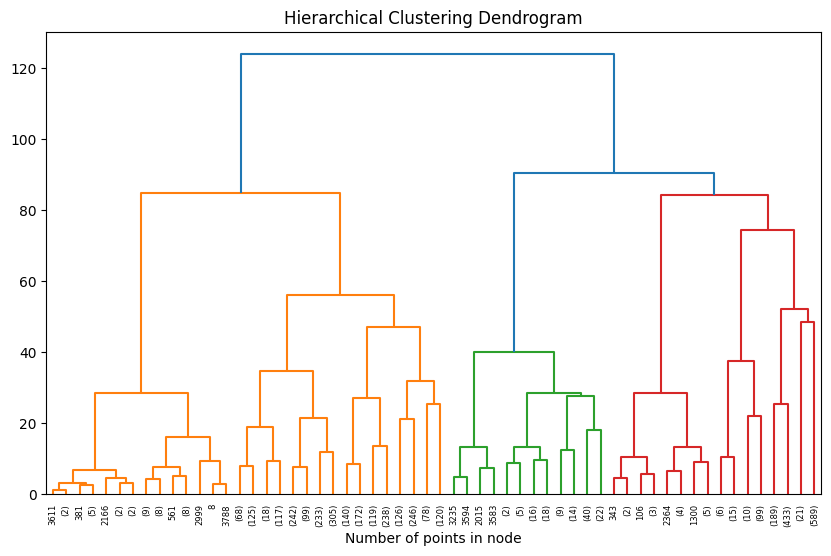

In [8]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
linkage_matrix = shc.linkage(df_scaled, method='ward')


plt.figure(figsize=(10, 6))
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_scaled)
plt.title('Hierarchical Clustering Dendrogram')
shc.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel("Number of points in node")
plt.show()

# Output:
# - We used AgglomerativeClustering to perform hierarchical clustering.
# - We visualized the hierarchical structure using a dendrogram.
# - We determined the optimal number of clusters based on the dendrogram.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

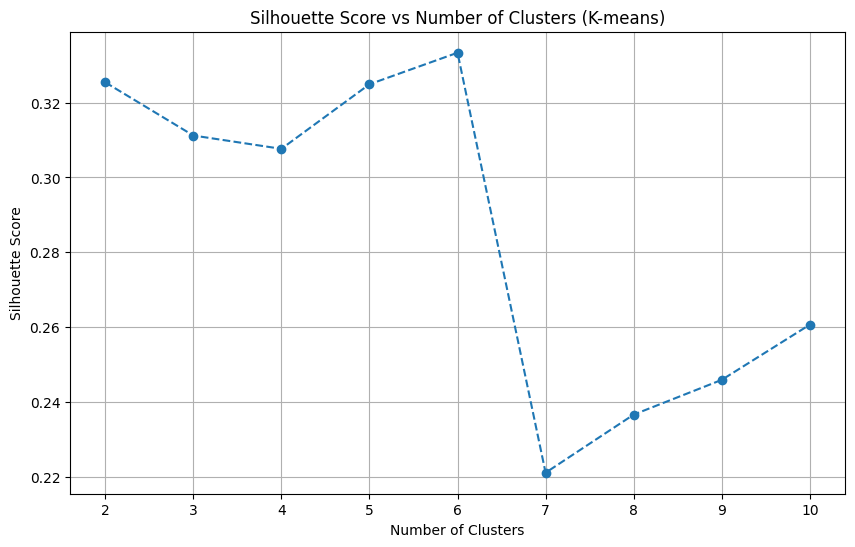

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Output:
# - We used KMeans clustering to segment the data into clusters.
# - We determined the optimal number of clusters using silhouette scores.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (K-means)')
plt.grid(True)
plt.show()


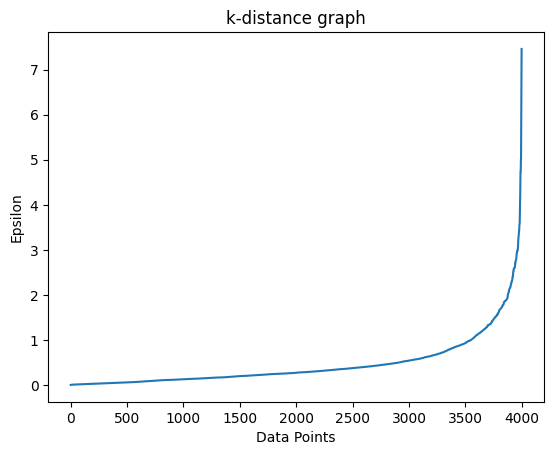

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=2)
nbrs = nn.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('k-distance graph')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

# Output:
# - We used DBSCAN clustering to segment the data into clusters.
# - We determined the optimal epsilon value based on the k-distance graph.
